# Analyze

The hypertools analyze function allows you to perform complex analyses (normalization, dimensionality reduction and alignement) in a single line of code!

(Note that the order of operation is always the following normalize -> reduce -> alignment)

## Import packages

In [8]:
import hypertools as hyp
import seaborn as sb

%matplotlib inline

## Load your data

First, we'll load one of the sample datasets. This dataset is a list of 2 `numpy` arrays, each containing average brain activity (fMRI) from 18 subjects listening to the same story, fit using Hierarchical Topographic Factor Analysis (HTFA) with 100 nodes.  The rows are timepoints and the columns are fMRI components. 

See the [full dataset](http://dataspace.princeton.edu/jspui/handle/88435/dsp015d86p269k) or the [Brainiak toolbox](www.brainiak.org) for more info on the data and HTFA, respectively. 

In [20]:
weights = hyp.load('weights_avg')
print(weights[0].shape) # 300 TRs and 100 components
print(weights[1].shape)

(300, 100)
(300, 100)


We can see that the elements of weights each have the dimensions (300,100).

We can further visualize the elements using a heatmap.

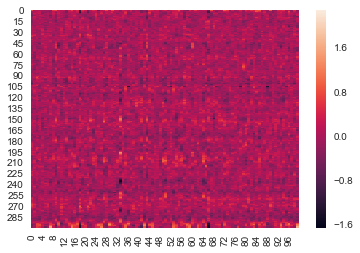

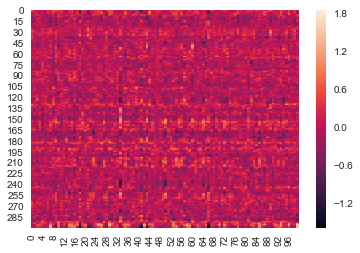

In [25]:
for x in range(len(weights)):
    sb.heatmap(weights[x])
    plt.show()

## Normalization

Here is an example where we z-score the columns within each list:

Normalize accepts the following arguments, as strings:
+ ‘across’ - z-scores columns across all lists (default)
+ ‘within’ - z-scores columns within each list
+ ‘row’ - z-scores each row of data

In [10]:
norm_within = hyp.analyze(weights, normalize='within')

We can again visualize the data (this time, normalized) using heatmaps.

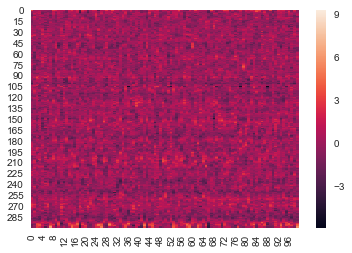

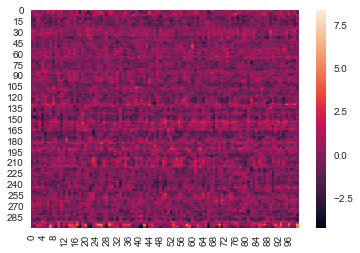

In [28]:
for x in range(len(norm_within)):
    sb.heatmap(norm_within[x])
    plt.show()

## Normalize and reduce

To easily normalize and reduce the dimensionality of the data, pass the normalize, reduce, and ndims arguments to the `analyze` function. The normalize argument, outlined above, specifies how the data should be normalized. The `reduce` argumemnt, specifies the desired method of reduction. The `ndims` argument (int) specifies the number of dimensions to reduce to.

Supported dimensionality reduction models include: PCA, IncrementalPCA, SparsePCA, MiniBatchSparsePCA, KernelPCA, FastICA, FactorAnalysis, TruncatedSVD, DictionaryLearning, MiniBatchDictionaryLearning, TSNE, Isomap, SpectralEmbedding, LocallyLinearEmbedding, and MDS. 

In [32]:
normed_reduced = hyp.analyze(weights, normalize='within', reduce='PCA', ndims=3)

We can again visaulize the data using heatmaps.

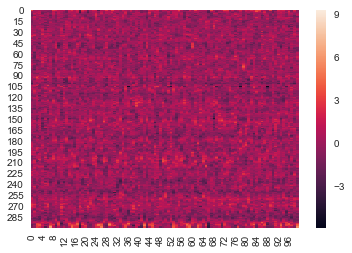

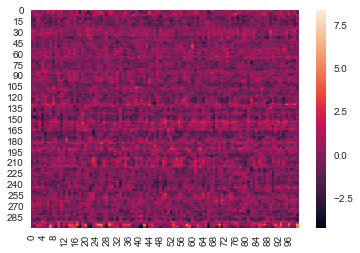

In [34]:
for x in range(len(normed_reduced)):
    sb.heatmap(norm_within[x])
    plt.show()

### Finer control

For finer control of the model parameters, `reduce` can be a dictionary with the keys `model` and `params`. See scikit-learn specific model docs for details on parameters supported for each model.

In [39]:
# dictionary of parameters
reduce={'model' : 'PCA', 'params' : {'whiten' : True}}

reduced_params = hyp.analyze(weights, normalize='within', reduce=reduce, ndims=3)

We can again visaulize the data using heatmaps.

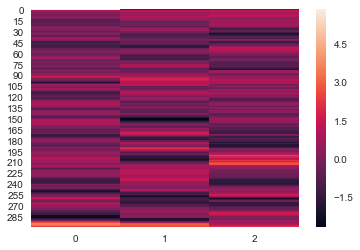

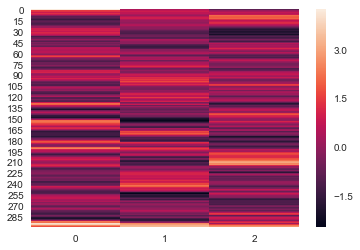

In [43]:
for x in range(len(reduced_params)):
    sb.heatmap(reduced_params[x])
    plt.show()

## Normalize, reduce, and align

Finally, we can normalize, reduce and then align all in one step.

The align argument can accept the following strings:
+ 'hyper' - implements [hyperalignment](http://haxbylab.dartmouth.edu/publications/HGC+11.pdf) algorithm
+ 'SRM' - implements shared response model via [Brainiak](http://brainiak.org)

In [44]:
norm_red_algn = hyp.analyze(weights, normalize='within', reduce='PCA', ndims=3, align='SRM')

Again, we can visualize the normed, reduced, and aligned data using a heatmap.

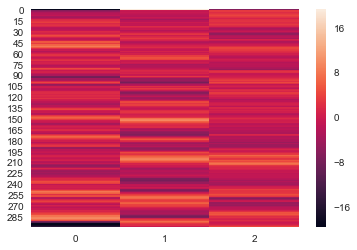

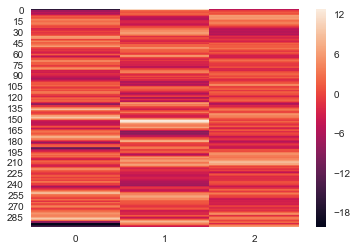

In [46]:
for x in range(len(norm_red_algn)):
    sb.heatmap(norm_red_algn[x])
    plt.show()